In [5]:
import os
import sys
newPath = os.path.dirname(os.path.abspath(""))
if newPath not in sys.path:
    sys.path.append(newPath)

from main import *
import time as tm
# setup platform------------------------------------------------
m = bi(platform='cpu')

# import data ------------------------------------------------
m.data('../resources/data/Howell1.csv', sep=';') 
m.df = m.df[m.df.age > 18]
m.scale(['weight'])
#m.data_to_model(['weight', 'height'])

 # define model ------------------------------------------------
def model(weight, height):    
    a = dist.normal( 178, 20, name = 'a',shape= [1])
    b = dist.lognormal(  0, 1, name = 'b',shape= [1])   
    s = dist.uniform( 0, 50, name = 's',shape = [1])
    lk("y", Normal(a + b * weight , s), obs=height)

# Run sampler ------------------------------------------------
m.run(model, num_samples=500,num_chains=4) 
m.summary()

jax.local_device_count 16


Compiling.. :   0%|          | 0/1000 [00:00<?, ?it/s]








Running chain 3: 100%|██████████| 1000/1000 [00:05<00:00, 191.95it/s]


,mean,sd,hdi_5.5%,hdi_94.5%
a[0],154.64,0.28,154.19,155.08
b[0],5.82,0.27,5.38,6.23
s[0],5.14,0.20,4.81,5.45


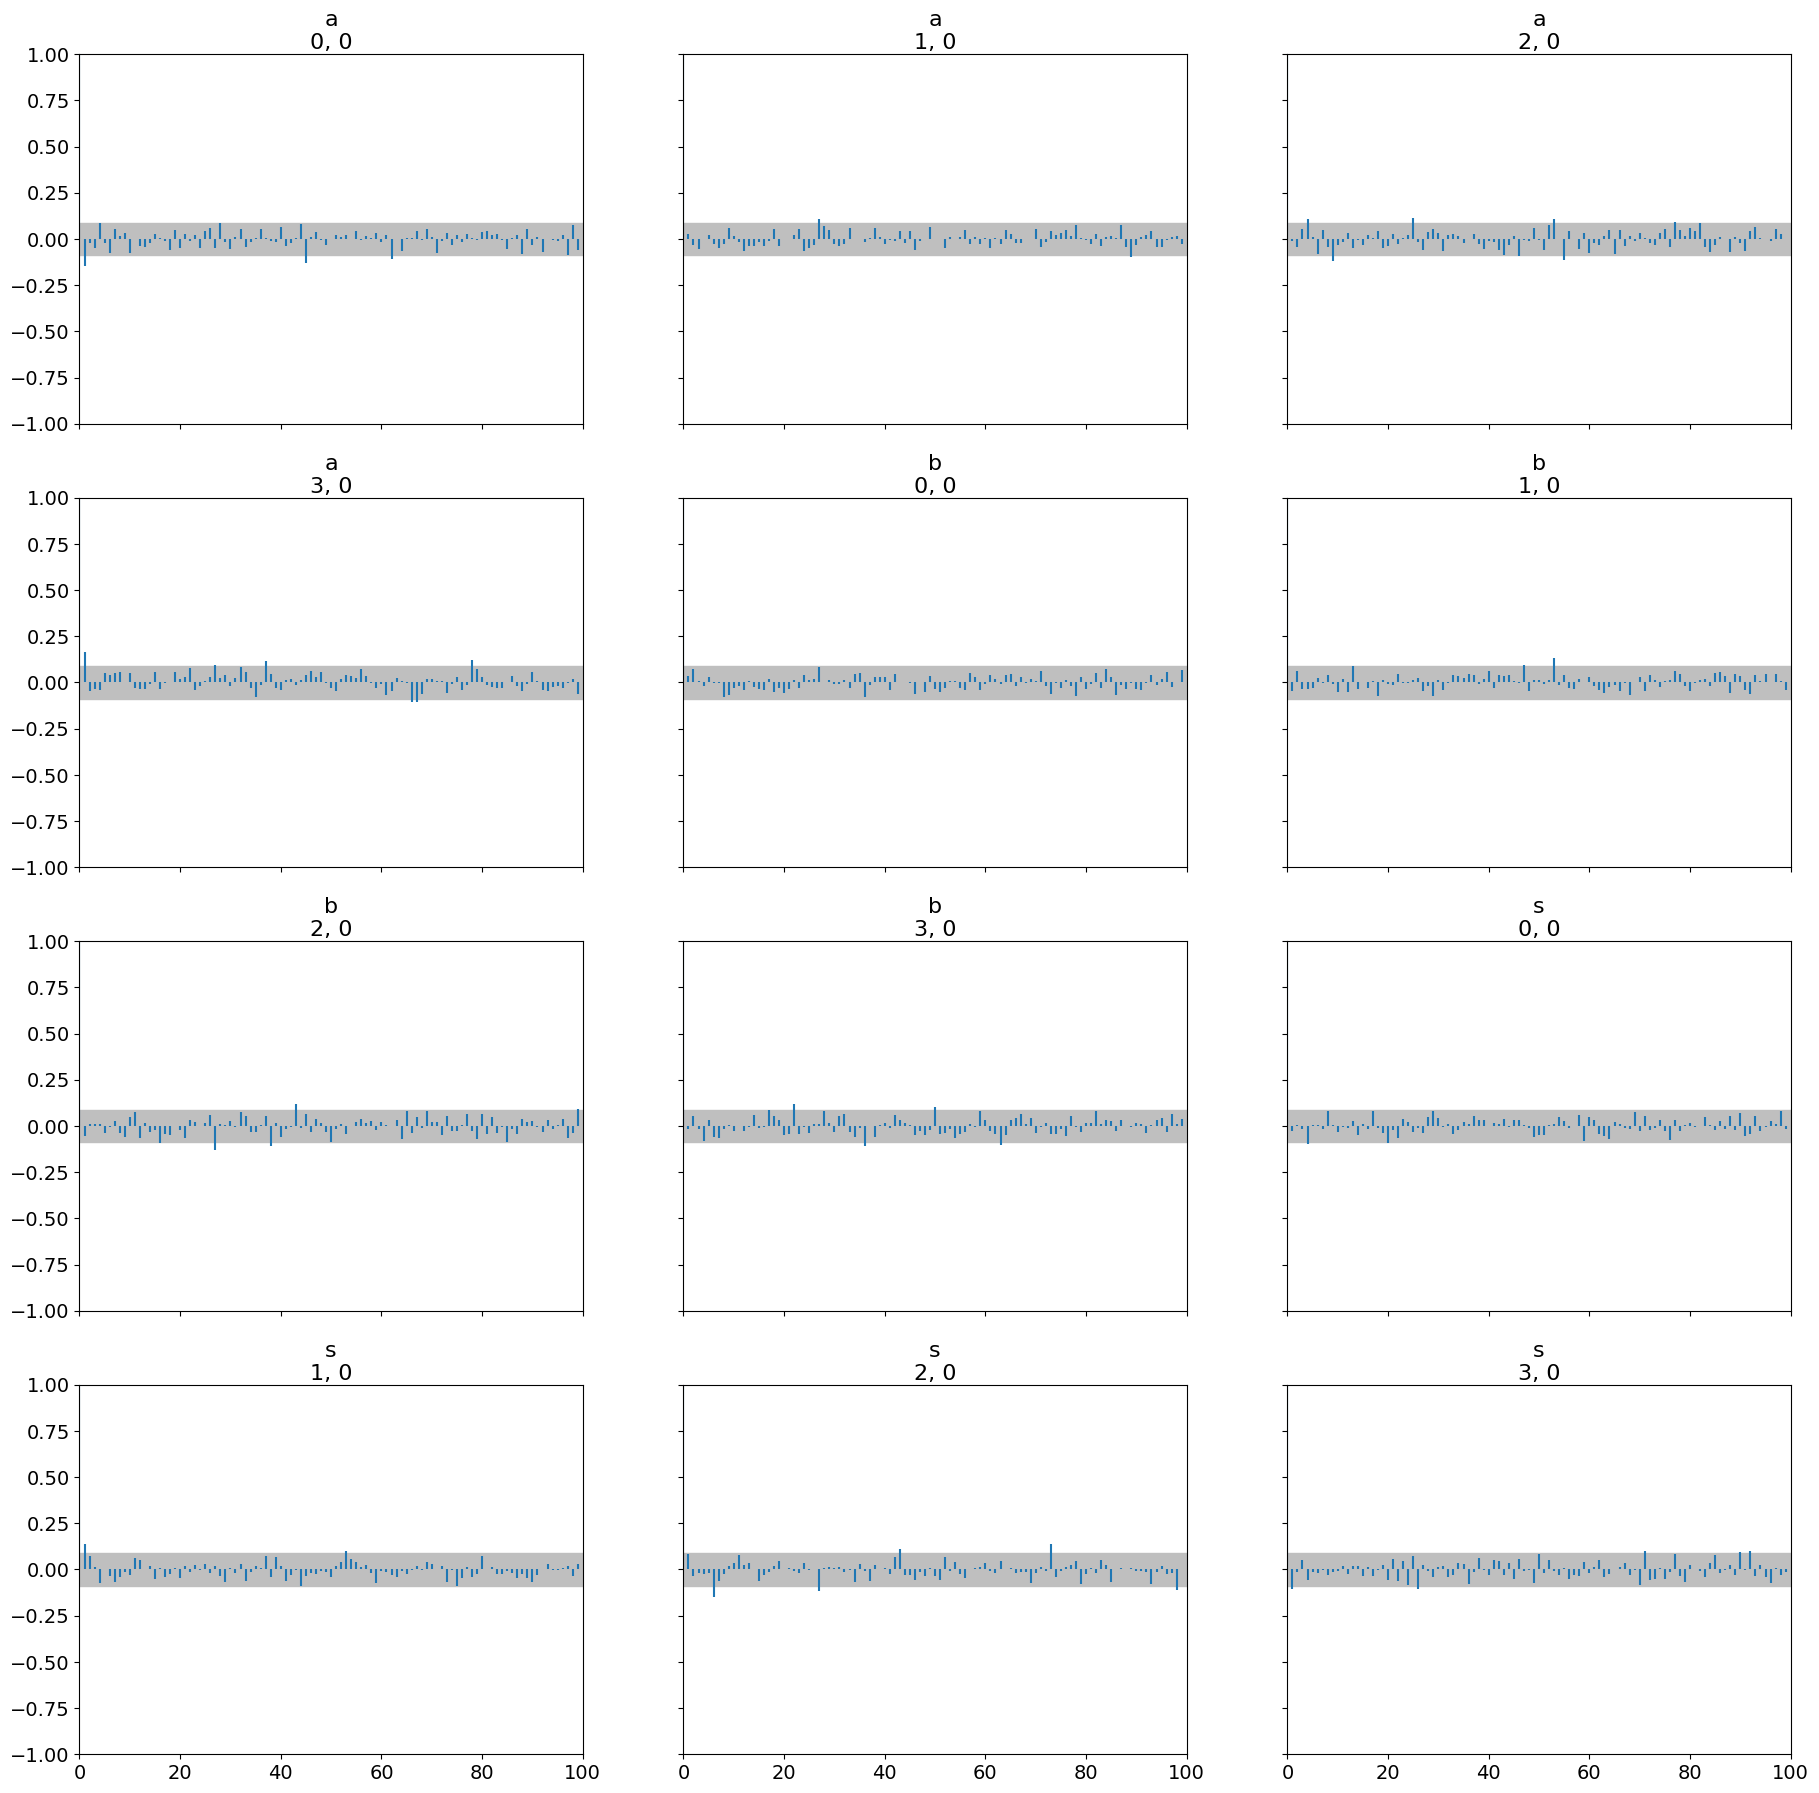

In [6]:
m.diag_autocor()

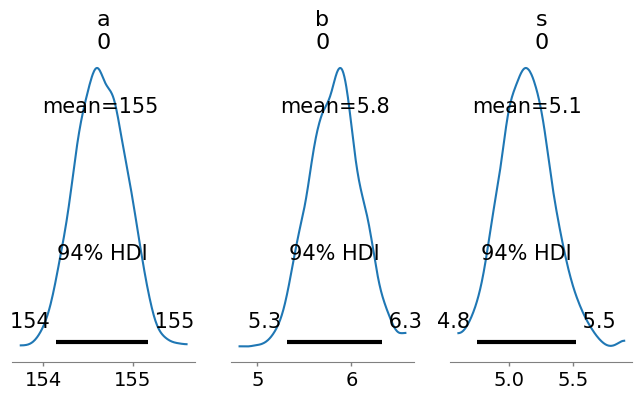

In [7]:
m.diag_posterior()

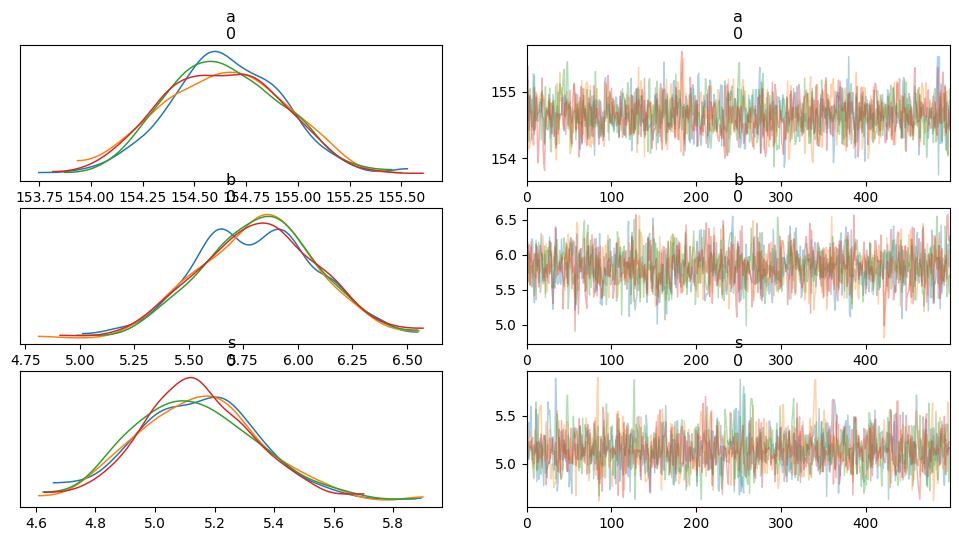

In [8]:
m.diag_traces()

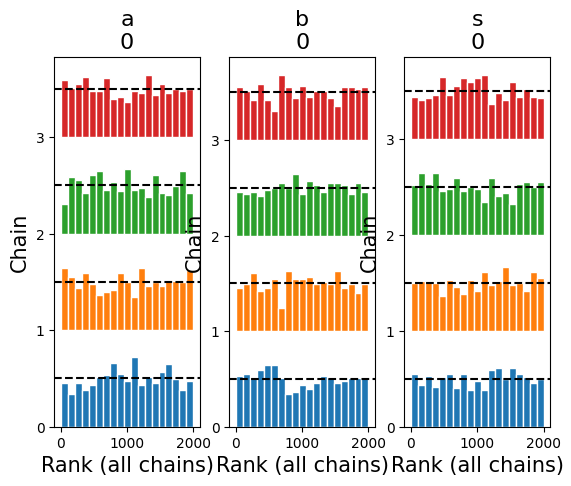

In [9]:
m.diag_rank()

array([<Axes: >, <Axes: title={'center': 'ess'}>], dtype=object)

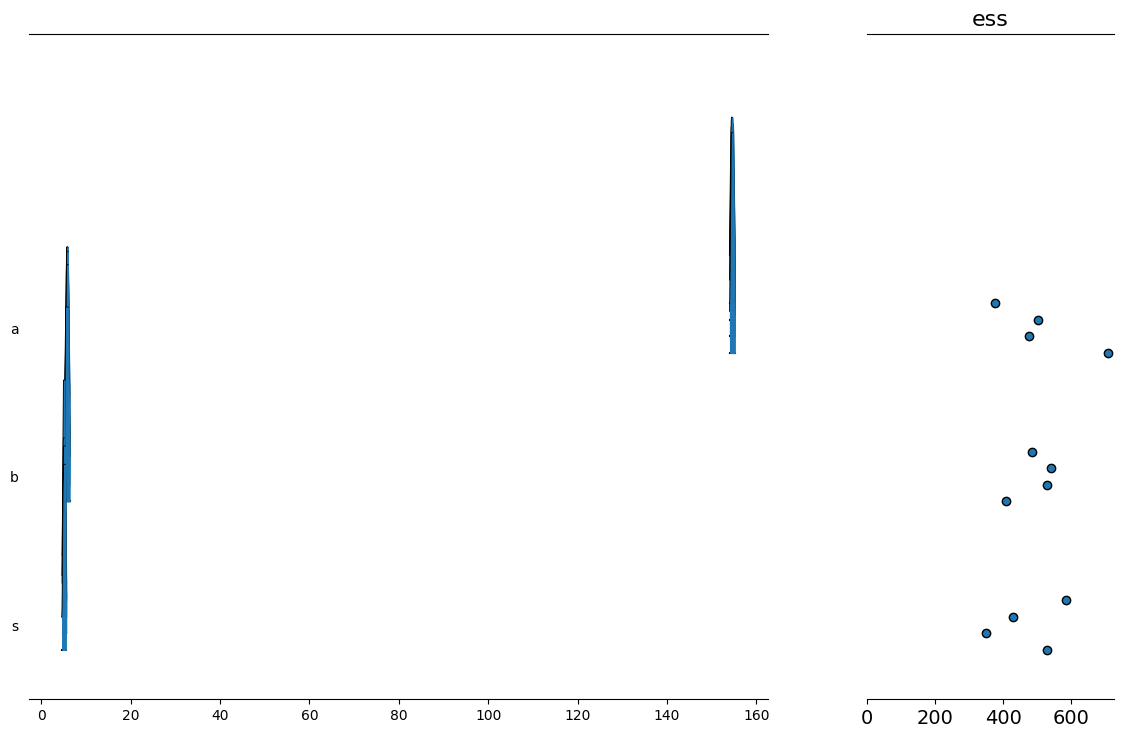

In [10]:
m.diag_forest()

array([[<Axes: ylabel='a\n0'>, <Axes: >, <Axes: >],
       [<Axes: ylabel='b\n0'>, <Axes: >, <Axes: >],
       [<Axes: xlabel='a\n0', ylabel='s\n0'>, <Axes: xlabel='b\n0'>,
        <Axes: xlabel='s\n0'>]], dtype=object)

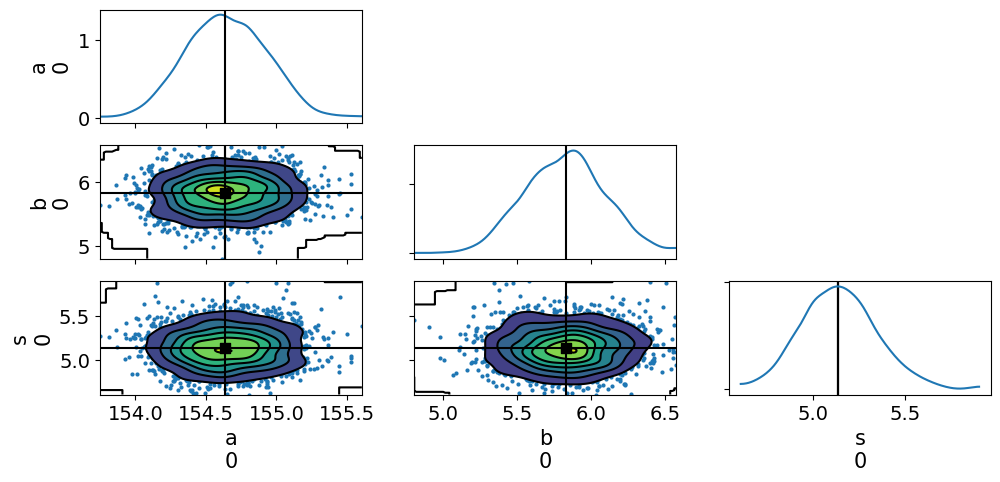

In [11]:
m.diag_pair()

array([[<Axes: title={'center': 'a\n0'}>,
        <Axes: title={'center': 'b\n0'}>,
        <Axes: title={'center': 's\n0'}>]], dtype=object)

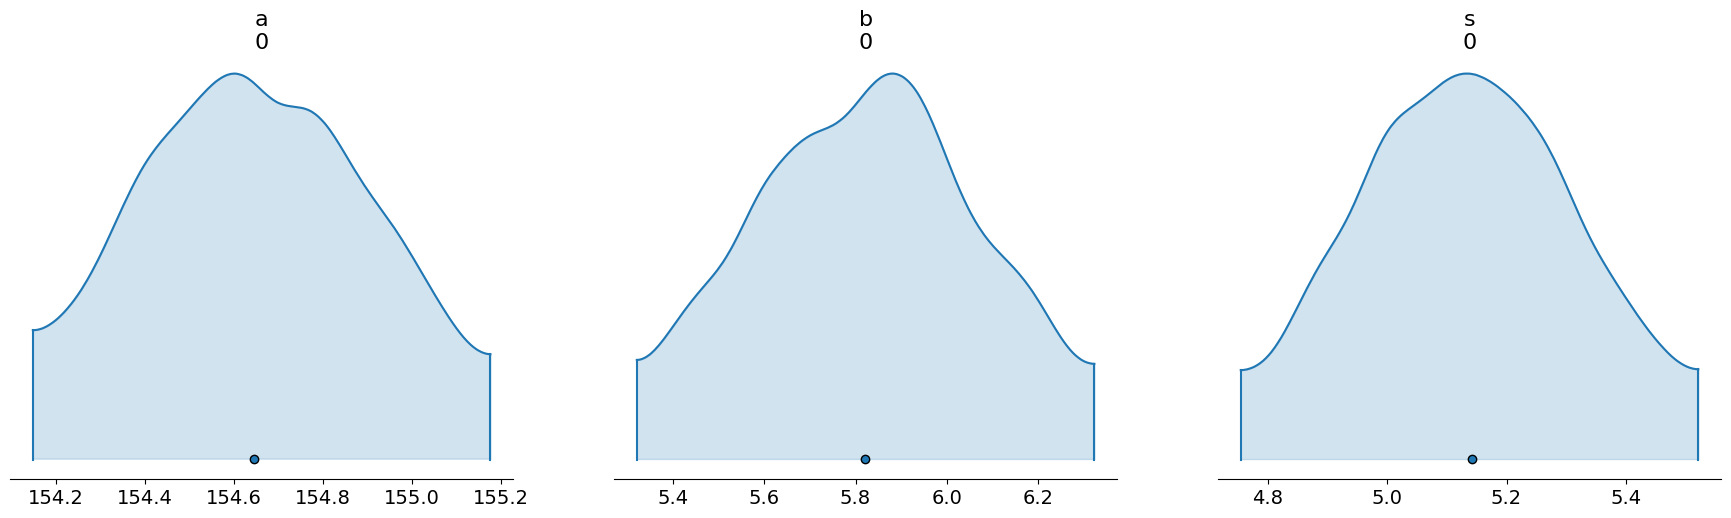

In [12]:
m.diag_density()

array([<Axes: title={'center': 'a\n0'}, xlabel='Total number of draws', ylabel='ESS'>,
       <Axes: title={'center': 'b\n0'}, xlabel='Total number of draws', ylabel='ESS'>,
       <Axes: title={'center': 's\n0'}, xlabel='Total number of draws', ylabel='ESS'>],
      dtype=object)

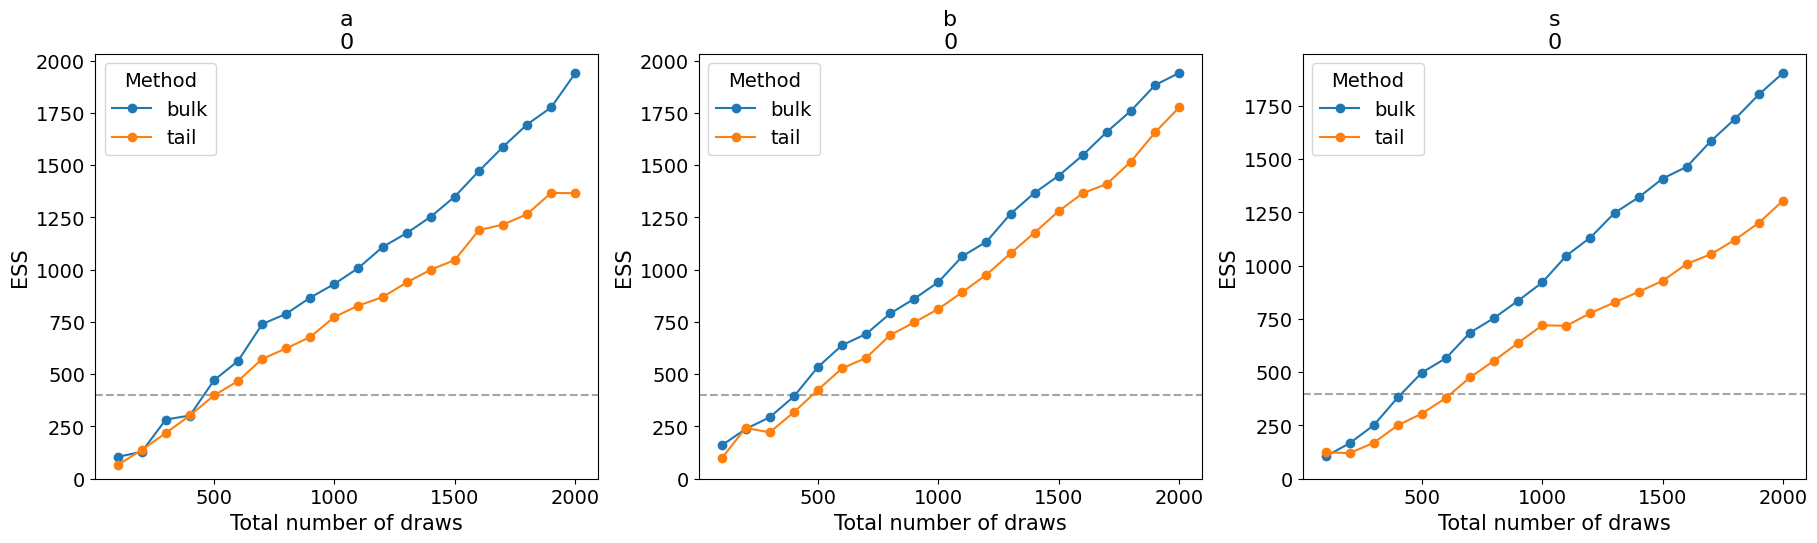

In [13]:
m.diag_plot_ess()